Summarize Coastal Vulnerability results by subregions.
For example, plot the average 'coastal_exposure' or 'habitat_role' value for all points within an area.

Intersect points with subregion polygons, make boxplots.

In [90]:
import pandas as pd
import os
import geopandas as gpd
import fiona
from shapely.geometry import MultiPoint, MultiPolygon, mapping
from shapely.ops import snap
%matplotlib inline

In [2]:
shapely.__version__

'1.5.17.post1'

In [3]:
workspace = '../mpa-removeall-habitat/cv-output-invest3.3.0/'

In [4]:
ce_pts = gpd.read_file(os.path.join(workspace, 'outputs/coastal_exposure/coastal_exposure.shp'))

In [46]:
subregions = gpd.read_file('/home/dmf/bahamas-mpa/cv/cv-fromjess/Bahamas_regionalCV_Inputs/LandPoly_Bahamas_subregions.shp')

In [47]:
geom_pts = MultiPoint(ce_pts.geometry)

In [102]:
regions_union = subregions.geometry.unary_union

In [118]:
type(regions_union)

shapely.geometry.multipolygon.MultiPolygon

In [52]:
geom_regions = MultiPolygon(subregions.geometry.unary_union)

In [101]:
type(geom_regions.boundary.coords)

NotImplementedError: Multi-part geometries do not provide a coordinate sequence

In [78]:
# snap the points to the subregions so that offshore points get included.
# and save snapped output
# snapped_pts = snap(geom_pts[0:1000], geom_regions, 0.10)
snapped_pts = ce_pts.geometry.apply(lambda x: snap(x, geom_regions, 600))

In [116]:
snapped_pts = ce_pts[0:20].geometry.apply(lambda x: snap(x, regions_union, 100))

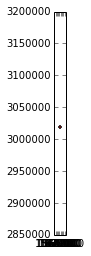

In [92]:
snaptest.plot()

In [79]:
len(snapped_pts) == len(ce_pts['FID'])

True

In [117]:
schema = {
    'geometry': 'Point',
    'properties': {'FID': 'int'},
}

with fiona.open(os.path.join(workspace, 'coastal_exposure_snapped2test_100.shp'), 
                'w', 'ESRI Shapefile', 
                schema, crs=ce_pts.crs) as c:
    for p, f in zip(snapped_pts, ce_pts[0:20]['FID']):
        c.write({
            'geometry': mapping(p),
            'properties': {'FID': f},
        })

In [67]:
pt = snapped_pts[0]

In [73]:
pt.coords.xy
mapping(pt)

{'coordinates': (162996.410662489, 3019659.2443845663), 'type': 'Point'}

In [72]:
for p, f in zip(snapped_pts[0:50], ce_pts['FID'][0:50]):
    print(p.coords.xy, f)

((array('d', [162996.410662489]), array('d', [3019659.2443845663])), 0.0)
((array('d', [162746.410662489]), array('d', [3019409.2443845663])), 1.0)
((array('d', [163246.410662489]), array('d', [3019409.2443845663])), 2.0)
((array('d', [163496.410662489]), array('d', [3019409.2443845663])), 3.0)
((array('d', [162746.410662489]), array('d', [3019159.2443845663])), 4.0)
((array('d', [163246.410662489]), array('d', [3019159.2443845663])), 5.0)
((array('d', [163746.410662489]), array('d', [3019159.2443845663])), 6.0)
((array('d', [163996.410662489]), array('d', [3019159.2443845663])), 7.0)
((array('d', [162996.410662489]), array('d', [3018909.2443845663])), 8.0)
((array('d', [163496.410662489]), array('d', [3018909.2443845663])), 9.0)
((array('d', [163746.410662489]), array('d', [3018909.2443845663])), 10.0)
((array('d', [164246.410662489]), array('d', [3018909.2443845663])), 11.0)
((array('d', [163996.410662489]), array('d', [3018659.2443845663])), 12.0)
((array('d', [169746.410662489]), a

In [36]:
ce_pts_snapped['snapped_geom'] = snapped_pts

TypeError: float() argument must be a string or a number

In [32]:
# intsect = ce_pts['geometry'].intersects(subregions['geometry'])

In [33]:
# intsect.value_counts()

False    27263
dtype: int64

In [36]:
# pts_in_region = gpd.sjoin(ce_pts, subregions, how='inner', op='intersects')

In [37]:
# pts_in_region.head()

,FID,geometry,index_right,CCA_1,CCN_1,ENGTYPE_1,HASC_1,ID_0,ID_1,ISO,NAME_0,NAME_1,NL_NAME_1,TYPE_1,VARNAME_1
0,0.0,POINT (162996.410662489 3019659.244384566),12,None,0,District,BS.GC,18,13,BHS,Bahamas,Grand Cay,None,District,None
13,13.0,POINT (169746.410662489 3016659.244384566),12,None,0,District,BS.GC,18,13,BHS,Bahamas,Grand Cay,None,District,None
14,14.0,POINT (169996.410662489 3016659.244384566),12,None,0,District,BS.GC,18,13,BHS,Bahamas,Grand Cay,None,District,None
15,15.0,POINT (169496.410662489 3016409.244384566),12,None,0,District,BS.GC,18,13,BHS,Bahamas,Grand Cay,None,District,None
16,16.0,POINT (170246.410662489 3016409.244384566),12,None,0,District,BS.GC,18,13,BHS,Bahamas,Grand Cay,None,District,None


In [38]:
# pts_in_region.size

87720